In [1]:
# MIT_Image

import os
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle
import gzip
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import cmath
import skimage.measure

# data path
path_csi =  'J:\\Data\\Wi-Fi_processed\\'
path_csi_hc = 'J:\\Data\\Wi-Fi_HC\\180_100\\'

# freq BW list
bw_list = pd.read_csv('wifi_f_bw_list.csv')

# data info
df_info = pd.read_csv('data_subc_sig_v1.csv')
#df_info = df_info[df_info.id_person < 50]
df_info = df_info[(df_info.id_location==1)  & (df_info.id_direction==1)]


person_uid = np.unique(df_info['id_person'])
dict_id = dict(zip(person_uid,np.arange(len(person_uid))))

# parameters
max_value = np.max(df_info['max'].values)
#no_classes = len(np.unique(df_info['id_person']))
no_classes = len(dict_id)
csi_time = int(np.max(df_info['len']))
csi_subc = 30
input_shape = (csi_time, csi_subc, 6)

C:\Users\herok\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# make data generator
def gen_csi(df_info,id_num,len_num):
    for file in np.unique(df_info.id.values):
        # read sample data
        # load and uncompress.
        with gzip.open(path_csi+file+'.pickle.gz','rb') as f:
            data1 = pickle.load(f)
        data1_diff = data1 #np.diff(data1,axis=0)
        # zero pad
        pad_len = len_num - data1_diff.shape[0]
        data1_pad = np.pad(data1_diff,((0,pad_len),(0,0),(0,0),(0,0)),'constant',constant_values=0)

        # Label
        id_key = df_info[df_info.id==file]['id_person'].values[0].astype('int')
        data1_y = dict_id[id_key]

        yield(data1_pad ,data1_y)

gen = gen_csi(df_info,no_classes,csi_time)
target_sig,_ = next(gen)


In [3]:
# 3D scan
m,n = 2,3
c =  299792458 # speed of light 
r = (160 + 160 + 164) * 0.01 # meter
#r = 1.64 #meter
d = 45 * 0.01 # meter
max_ch = 1#3
subc = 14

th_range,si_range = (30,30)
sig_mat = np.zeros([max_ch,csi_time,th_range,si_range])

# 3D calc func
def calc_p(target_sig,r,ch,theta,sigma):
    lam = c*0.000001 / bw_list[str(subc)][ch] #wavelength = 300 / frequency in MHz
    sum_eq = np.zeros(csi_time,dtype=np.complex_) #np.complex(0)
    for i in range(m):
        for j in range(n):
            for t in range(csi_time):
                k = 0 #math.tan(np.angle(target_sig[t,i,j]))
                above_eq1 = 1j * (2*math.pi) * (t * 10 / csi_time) * r * k / c
                above_eq2 = 1j * (2*math.pi/lam) * math.sin(theta) * (n*d*math.cos(sigma) + m*d*math.sin(sigma))
                sum_eq[t] = np.angle(target_sig[t,i,j] * cmath.exp(above_eq1) *cmath.exp(above_eq2))
    return(sum_eq)


In [4]:
for s in range(max_ch):
    for i in range(-th_range,th_range):
        for j in range(-si_range,si_range):
            theta = i * (2*math.pi/2) / th_range
            sigma = j * (2*math.pi/2) / si_range
            sig_mat[s,:,i,j] =  calc_p(target_sig[:,subc,:,:],r,8,theta,sigma)
            print((s,i,j))

C:\Users\herok\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


(0, -30, -30)
(0, -30, -29)
(0, -30, -28)
(0, -30, -27)
(0, -30, -26)
(0, -30, -25)
(0, -30, -24)
(0, -30, -23)
(0, -30, -22)
(0, -30, -21)
(0, -30, -20)
(0, -30, -19)
(0, -30, -18)
(0, -30, -17)
(0, -30, -16)
(0, -30, -15)
(0, -30, -14)
(0, -30, -13)
(0, -30, -12)
(0, -30, -11)
(0, -30, -10)
(0, -30, -9)
(0, -30, -8)
(0, -30, -7)
(0, -30, -6)
(0, -30, -5)
(0, -30, -4)
(0, -30, -3)
(0, -30, -2)
(0, -30, -1)
(0, -30, 0)
(0, -30, 1)
(0, -30, 2)
(0, -30, 3)
(0, -30, 4)
(0, -30, 5)
(0, -30, 6)
(0, -30, 7)
(0, -30, 8)
(0, -30, 9)
(0, -30, 10)
(0, -30, 11)
(0, -30, 12)
(0, -30, 13)
(0, -30, 14)
(0, -30, 15)
(0, -30, 16)
(0, -30, 17)
(0, -30, 18)
(0, -30, 19)
(0, -30, 20)
(0, -30, 21)
(0, -30, 22)
(0, -30, 23)
(0, -30, 24)
(0, -30, 25)
(0, -30, 26)
(0, -30, 27)
(0, -30, 28)
(0, -30, 29)
(0, -29, -30)
(0, -29, -29)
(0, -29, -28)
(0, -29, -27)
(0, -29, -26)
(0, -29, -25)
(0, -29, -24)
(0, -29, -23)
(0, -29, -22)
(0, -29, -21)
(0, -29, -20)
(0, -29, -19)
(0, -29, -18)
(0, -29, -17)
(0, -29, -16)

(0, -20, -9)
(0, -20, -8)
(0, -20, -7)
(0, -20, -6)
(0, -20, -5)
(0, -20, -4)
(0, -20, -3)
(0, -20, -2)
(0, -20, -1)
(0, -20, 0)
(0, -20, 1)
(0, -20, 2)
(0, -20, 3)
(0, -20, 4)
(0, -20, 5)
(0, -20, 6)
(0, -20, 7)
(0, -20, 8)
(0, -20, 9)
(0, -20, 10)
(0, -20, 11)
(0, -20, 12)
(0, -20, 13)
(0, -20, 14)
(0, -20, 15)
(0, -20, 16)
(0, -20, 17)
(0, -20, 18)
(0, -20, 19)
(0, -20, 20)
(0, -20, 21)
(0, -20, 22)
(0, -20, 23)
(0, -20, 24)
(0, -20, 25)
(0, -20, 26)
(0, -20, 27)
(0, -20, 28)
(0, -20, 29)
(0, -19, -30)
(0, -19, -29)
(0, -19, -28)
(0, -19, -27)
(0, -19, -26)
(0, -19, -25)
(0, -19, -24)
(0, -19, -23)
(0, -19, -22)
(0, -19, -21)
(0, -19, -20)
(0, -19, -19)
(0, -19, -18)
(0, -19, -17)
(0, -19, -16)
(0, -19, -15)
(0, -19, -14)
(0, -19, -13)
(0, -19, -12)
(0, -19, -11)
(0, -19, -10)
(0, -19, -9)
(0, -19, -8)
(0, -19, -7)
(0, -19, -6)
(0, -19, -5)
(0, -19, -4)
(0, -19, -3)
(0, -19, -2)
(0, -19, -1)
(0, -19, 0)
(0, -19, 1)
(0, -19, 2)
(0, -19, 3)
(0, -19, 4)
(0, -19, 5)
(0, -19, 6)
(0, -19,

(0, -10, 14)
(0, -10, 15)
(0, -10, 16)
(0, -10, 17)
(0, -10, 18)
(0, -10, 19)
(0, -10, 20)
(0, -10, 21)
(0, -10, 22)
(0, -10, 23)
(0, -10, 24)
(0, -10, 25)
(0, -10, 26)
(0, -10, 27)
(0, -10, 28)
(0, -10, 29)
(0, -9, -30)
(0, -9, -29)
(0, -9, -28)
(0, -9, -27)
(0, -9, -26)
(0, -9, -25)
(0, -9, -24)
(0, -9, -23)
(0, -9, -22)
(0, -9, -21)
(0, -9, -20)
(0, -9, -19)
(0, -9, -18)
(0, -9, -17)
(0, -9, -16)
(0, -9, -15)
(0, -9, -14)
(0, -9, -13)
(0, -9, -12)
(0, -9, -11)
(0, -9, -10)
(0, -9, -9)
(0, -9, -8)
(0, -9, -7)
(0, -9, -6)
(0, -9, -5)
(0, -9, -4)
(0, -9, -3)
(0, -9, -2)
(0, -9, -1)
(0, -9, 0)
(0, -9, 1)
(0, -9, 2)
(0, -9, 3)
(0, -9, 4)
(0, -9, 5)
(0, -9, 6)
(0, -9, 7)
(0, -9, 8)
(0, -9, 9)
(0, -9, 10)
(0, -9, 11)
(0, -9, 12)
(0, -9, 13)
(0, -9, 14)
(0, -9, 15)
(0, -9, 16)
(0, -9, 17)
(0, -9, 18)
(0, -9, 19)
(0, -9, 20)
(0, -9, 21)
(0, -9, 22)
(0, -9, 23)
(0, -9, 24)
(0, -9, 25)
(0, -9, 26)
(0, -9, 27)
(0, -9, 28)
(0, -9, 29)
(0, -8, -30)
(0, -8, -29)
(0, -8, -28)
(0, -8, -27)
(0, -8, -

(0, 2, -24)
(0, 2, -23)
(0, 2, -22)
(0, 2, -21)
(0, 2, -20)
(0, 2, -19)
(0, 2, -18)
(0, 2, -17)
(0, 2, -16)
(0, 2, -15)
(0, 2, -14)
(0, 2, -13)
(0, 2, -12)
(0, 2, -11)
(0, 2, -10)
(0, 2, -9)
(0, 2, -8)
(0, 2, -7)
(0, 2, -6)
(0, 2, -5)
(0, 2, -4)
(0, 2, -3)
(0, 2, -2)
(0, 2, -1)
(0, 2, 0)
(0, 2, 1)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 2, 11)
(0, 2, 12)
(0, 2, 13)
(0, 2, 14)
(0, 2, 15)
(0, 2, 16)
(0, 2, 17)
(0, 2, 18)
(0, 2, 19)
(0, 2, 20)
(0, 2, 21)
(0, 2, 22)
(0, 2, 23)
(0, 2, 24)
(0, 2, 25)
(0, 2, 26)
(0, 2, 27)
(0, 2, 28)
(0, 2, 29)
(0, 3, -30)
(0, 3, -29)
(0, 3, -28)
(0, 3, -27)
(0, 3, -26)
(0, 3, -25)
(0, 3, -24)
(0, 3, -23)
(0, 3, -22)
(0, 3, -21)
(0, 3, -20)
(0, 3, -19)
(0, 3, -18)
(0, 3, -17)
(0, 3, -16)
(0, 3, -15)
(0, 3, -14)
(0, 3, -13)
(0, 3, -12)
(0, 3, -11)
(0, 3, -10)
(0, 3, -9)
(0, 3, -8)
(0, 3, -7)
(0, 3, -6)
(0, 3, -5)
(0, 3, -4)
(0, 3, -3)
(0, 3, -2)
(0, 3, -1)
(0, 3, 0)
(0, 3, 1)
(0, 3, 2)
(0, 3, 3)
(0, 3, 4)


(0, 13, 28)
(0, 13, 29)
(0, 14, -30)
(0, 14, -29)
(0, 14, -28)
(0, 14, -27)
(0, 14, -26)
(0, 14, -25)
(0, 14, -24)
(0, 14, -23)
(0, 14, -22)
(0, 14, -21)
(0, 14, -20)
(0, 14, -19)
(0, 14, -18)
(0, 14, -17)
(0, 14, -16)
(0, 14, -15)
(0, 14, -14)
(0, 14, -13)
(0, 14, -12)
(0, 14, -11)
(0, 14, -10)
(0, 14, -9)
(0, 14, -8)
(0, 14, -7)
(0, 14, -6)
(0, 14, -5)
(0, 14, -4)
(0, 14, -3)
(0, 14, -2)
(0, 14, -1)
(0, 14, 0)
(0, 14, 1)
(0, 14, 2)
(0, 14, 3)
(0, 14, 4)
(0, 14, 5)
(0, 14, 6)
(0, 14, 7)
(0, 14, 8)
(0, 14, 9)
(0, 14, 10)
(0, 14, 11)
(0, 14, 12)
(0, 14, 13)
(0, 14, 14)
(0, 14, 15)
(0, 14, 16)
(0, 14, 17)
(0, 14, 18)
(0, 14, 19)
(0, 14, 20)
(0, 14, 21)
(0, 14, 22)
(0, 14, 23)
(0, 14, 24)
(0, 14, 25)
(0, 14, 26)
(0, 14, 27)
(0, 14, 28)
(0, 14, 29)
(0, 15, -30)
(0, 15, -29)
(0, 15, -28)
(0, 15, -27)
(0, 15, -26)
(0, 15, -25)
(0, 15, -24)
(0, 15, -23)
(0, 15, -22)
(0, 15, -21)
(0, 15, -20)
(0, 15, -19)
(0, 15, -18)
(0, 15, -17)
(0, 15, -16)
(0, 15, -15)
(0, 15, -14)
(0, 15, -13)
(0, 15, -12

(0, 25, -20)
(0, 25, -19)
(0, 25, -18)
(0, 25, -17)
(0, 25, -16)
(0, 25, -15)
(0, 25, -14)
(0, 25, -13)
(0, 25, -12)
(0, 25, -11)
(0, 25, -10)
(0, 25, -9)
(0, 25, -8)
(0, 25, -7)
(0, 25, -6)
(0, 25, -5)
(0, 25, -4)
(0, 25, -3)
(0, 25, -2)
(0, 25, -1)
(0, 25, 0)
(0, 25, 1)
(0, 25, 2)
(0, 25, 3)
(0, 25, 4)
(0, 25, 5)
(0, 25, 6)
(0, 25, 7)
(0, 25, 8)
(0, 25, 9)
(0, 25, 10)
(0, 25, 11)
(0, 25, 12)
(0, 25, 13)
(0, 25, 14)
(0, 25, 15)
(0, 25, 16)
(0, 25, 17)
(0, 25, 18)
(0, 25, 19)
(0, 25, 20)
(0, 25, 21)
(0, 25, 22)
(0, 25, 23)
(0, 25, 24)
(0, 25, 25)
(0, 25, 26)
(0, 25, 27)
(0, 25, 28)
(0, 25, 29)
(0, 26, -30)
(0, 26, -29)
(0, 26, -28)
(0, 26, -27)
(0, 26, -26)
(0, 26, -25)
(0, 26, -24)
(0, 26, -23)
(0, 26, -22)
(0, 26, -21)
(0, 26, -20)
(0, 26, -19)
(0, 26, -18)
(0, 26, -17)
(0, 26, -16)
(0, 26, -15)
(0, 26, -14)
(0, 26, -13)
(0, 26, -12)
(0, 26, -11)
(0, 26, -10)
(0, 26, -9)
(0, 26, -8)
(0, 26, -7)
(0, 26, -6)
(0, 26, -5)
(0, 26, -4)
(0, 26, -3)
(0, 26, -2)
(0, 26, -1)
(0, 26, 0)
(0, 26,

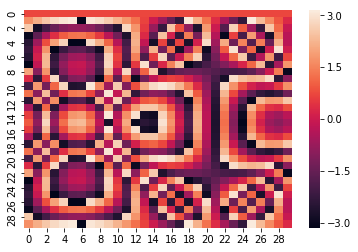

In [13]:
import seaborn as sns
ax = sns.heatmap(sig_mat[0,11000,:th_range,:si_range])#,vmin=np.median(sig_mat))

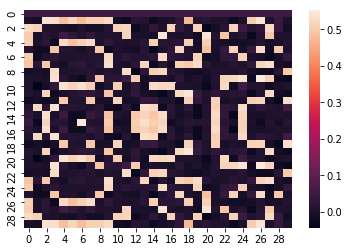

In [6]:
sig1 = np.mean(sig_mat,axis=1)
ax1 = sns.heatmap(sig1[0,:th_range,:si_range])#,vmin=np.median(sig_mat))